## Overview

The COVID-19 pandemic has had a profound and long-lasting impact on the global economy; therefore, household credit card debt is also influenced. This project aims to investigate how financial literacy and household credit card debt have changed after COVID-19. Our team will be using two large-scale datasets from the years 2020 and 2024 Federal Reserve’s Survey of Household Economics and Decisionmaking (SHED).

By comparing the 2020 and 2024 SHED datasets, this project will explore how levels of financial literacy, credit access, and repayment behavior have evolved in response to the pandemic’s lasting economic effects. The analysis will examine demographic variables such as income, age, and education level to identify which groups experienced the most significant changes in credit card usage and debt management. We will also consider economic influences to interpret shifts in household financial behavior.

Our approach combines data integration, cleaning, and statistical analysis to ensure a transparent and reproducible workflow. The findings will provide insights into how households adapted their financial strategies in the years following COVID-19 and last year of 2024 after COVID-19.  

The CFPB of Consumer Credit Trends dataset provides monthly, nationwide information on new credit card originations. It includes the total dollar volume of new credit card limits issued to different credit score groups, ranging from deep subprime to super-prime borrowers. The dataset contains both seasonally adjusted and unadjusted lending volumes, allowing analysis of raw lending activity as well as smoothed long-term trends from the year 2007 Jan to 2025 Apr. Each row represents one credit score category for a given month. This dataset helps us understand how lending patterns differ across borrower risk levels.

This dataset will allow us to enrich SHED respondents’ financial experiences with contextual information about the broader credit environment. Adding the CFPB dataset introduces some challenges in the data integration process, which strengthens the methodological rigor of our project.


The overall goal is to produce a reproducible, data-integrated analysis that would demonstrate how the pandemic and economic disruptions affect individuals’ financial decision-making and credit outcomes. Through the process of merging these two large federal datasets, we will illustrate multiple aspects of the data lifecycle and other techniques that were learned in class.

In addition to the technical aims, this project will contribute to a broader understanding of financial resilience: how knowledge, education, and access to certain financial resources influence households to make financial decisions and manage debt in a time of crisis. And by highlighting the difference between 2020 and 2024, we hope to address the importance of promoting household stability in an unstable economic setting.

## Research Question

1. Did the strength of the relationship between financial literacy and household credit card debt change after the COVID-19 pandemic?

2. Did households with higher financial literacy show smaller increases in debt post-COVID-19?



## Overview

The COVID-19 pandemic has had a profound and long-lasting impact on the global economy; therefore, household credit card debt is also influenced. This project aims to investigate how financial literacy and household credit card debt have changed after COVID-19. Our team will be using two large-scale datasets from the years 2020 and 2024 Federal Reserve’s Survey of Household Economics and Decisionmaking (SHED).

By comparing the 2020 and 2024 SHED datasets, this project will explore how levels of financial literacy, credit access, and repayment behavior have evolved in response to the pandemic’s lasting economic effects. The analysis will examine demographic variables such as income, age, and education level to identify which groups experienced the most significant changes in credit card usage and debt management. We will also consider economic influences to interpret shifts in household financial behavior.

Our approach combines data integration, cleaning, and statistical analysis to ensure a transparent and reproducible workflow. The findings will provide insights into how households adapted their financial strategies in the years following COVID-19 and last year of 2024 after COVID-19.  

The CFPB of Consumer Credit Trends dataset provides monthly, nationwide information on new credit card originations. It includes the total dollar volume of new credit card limits issued to different credit score groups, ranging from deep subprime to super-prime borrowers. The dataset contains both seasonally adjusted and unadjusted lending volumes, allowing analysis of raw lending activity as well as smoothed long-term trends from the year 2007 Jan to 2025 Apr. Each row represents one credit score category for a given month. This dataset helps us understand how lending patterns differ across borrower risk levels.

This dataset will allow us to enrich SHED respondents’ financial experiences with contextual information about the broader credit environment. Adding the CFPB dataset introduces some challenges in the data integration process, which strengthens the methodological rigor of our project.


The overall goal is to produce a reproducible, data-integrated analysis that would demonstrate how the pandemic and economic disruptions affect individuals’ financial decision-making and credit outcomes. Through the process of merging these two large federal datasets, we will illustrate multiple aspects of the data lifecycle and other techniques that were learned in class.

In addition to the technical aims, this project will contribute to a broader understanding of financial resilience: how knowledge, education, and access to certain financial resources influence households to make financial decisions and manage debt in a time of crisis. And by highlighting the difference between 2020 and 2024, we hope to address the importance of promoting household stability in an unstable economic setting.

## Research Question

1. Did the strength of the relationship between financial literacy and household credit card debt change after the COVID-19 pandemic?

2. Did households with higher financial literacy show smaller increases in debt post-COVID-19?



In [67]:
pip install pyreadstat


In [68]:
from pathlib import Path
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
from pathlib import Path
import io

pd.set_option('display.max_rows', None)

We will be using three large dataset from our data cleaned SHED 2024, 2020, and CFPB.

In [69]:
df_shed24 = pd.read_csv("/content/shed24_cleaned2.csv")
df_shed20 = pd.read_csv("/content/shed20_cleaned2.csv")
df_crc = pd.read_csv("/content/cfpd_cleaned2.csv")

We will make a new column of its year corresponding to each SHED dataset.

In [70]:
df_shed20["year"] =  2020
df_shed20.head()

,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,EF3_E,EF3_F,EF3_G,EF3_H,risk_score,proxy_credit_group,year
0,1,1,0,0,0,1,0,0,0,0,0,3,Prime,2020
1,1,0,1,0,0,1,0,0,0,0,0,0,Super-prime,2020
2,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
3,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
4,1,0,1,1,0,1,0,0,0,0,0,0,Super-prime,2020


In [71]:
df_shed24["year"] = 2024
df_shed24.head()

,C2A,C4A,EF1,EF3_a,EF3_b,EF3_c,EF3_d,EF3_e,EF3_f,EF3_g,EF3_h,risk_score,proxy_credit_group,year
0,Yes,Never carried an unpaid balance (always pay in...,Yes,Yes,No,No,No,No,No,No,No,0,Super-prime,2024
1,Yes,Never carried an unpaid balance (always pay in...,Yes,No,No,Yes,No,No,No,No,No,0,Super-prime,2024
2,Yes,Never carried an unpaid balance (always pay in...,No,No,No,Yes,No,No,No,No,No,2,Prime,2024
3,Yes,Never carried an unpaid balance (always pay in...,Yes,Yes,No,No,No,No,No,No,No,0,Super-prime,2024
4,Yes,Never carried an unpaid balance (always pay in...,No,Yes,No,No,No,No,No,No,No,2,Prime,2024


We will make SHED 2024 dataset same format of its value as SHED 2020 that turning into all integers.

In [72]:
# identify values that has yes/no
yes_no_cols = [
    cols for cols in df_shed24.columns
    if df_shed24[cols].isin(["Yes", "No"])
.any()]


# convert yes/no to 1 to 0, except C4A
for col in yes_no_cols:
  if col != "C4A":
    df_shed24[col] = df_shed24[col].map({"Yes": 1, "No": 0})

print(df_shed24.shape)
df_shed24.head()

(12292, 14)


,C2A,C4A,EF1,EF3_a,EF3_b,EF3_c,EF3_d,EF3_e,EF3_f,EF3_g,EF3_h,risk_score,proxy_credit_group,year
0,1,Never carried an unpaid balance (always pay in...,1,1,0,0,0,0,0,0,0,0,Super-prime,2024
1,1,Never carried an unpaid balance (always pay in...,1,0,0,1,0,0,0,0,0,0,Super-prime,2024
2,1,Never carried an unpaid balance (always pay in...,0,0,0,1,0,0,0,0,0,2,Prime,2024
3,1,Never carried an unpaid balance (always pay in...,1,1,0,0,0,0,0,0,0,0,Super-prime,2024
4,1,Never carried an unpaid balance (always pay in...,0,1,0,0,0,0,0,0,0,2,Prime,2024


In [73]:
# convert C4A values into integer
df_shed24["C4A"] = df_shed24["C4A"].map({"Never carried an unpaid balance (always pay in full)": 0,
                                         "Once":1, "Some of the time": 2, "Most or all of the time":3,
                                         "No credit card ownership": -2})
df_shed24["C4A"].unique()


array([ 0,  3,  2,  1, -2])


we have to make SHED 2024 feature names with SHED 2020 as well.

In [74]:
# change columns names of shed24 same as shed20
df_shed24 = df_shed24.rename(columns={
    "EF3_a": "EF3_A",
    "EF3_b": "EF3_B",
    "EF3_c": "EF3_C",
    "EF3_d": "EF3_D",
    "EF3_e": "EF3_E",
    "EF3_f": "EF3_F",
    "EF3_g": "EF3_G",
    "EF3_h": "EF3_H"
})
df_shed24.head()

,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,EF3_E,EF3_F,EF3_G,EF3_H,risk_score,proxy_credit_group,year
0,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2024
1,1,0,1,0,0,1,0,0,0,0,0,0,Super-prime,2024
2,1,0,0,0,0,1,0,0,0,0,0,2,Prime,2024
3,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2024
4,1,0,0,1,0,0,0,0,0,0,0,2,Prime,2024


In [75]:
print(df_shed24.shape)
print(df_shed20.shape)

(12292, 14)
(11511, 14)


The SHED 2024 dataset has a larger number of survey respondents than 2020. This will be misleading as comparing between 2020 and 2024, because the unequal sample sizes can bias group level comparison. We have to make it match to ensure observing differences on true changes.

We will use ramdom subsampling stategy to harmonize the sample sizes across years, by treating 2024 respondents as a representative sample.

In [76]:
df_shed24ver1 = df_shed24.sample(n=11511, random_state=42)
print(df_shed24ver1.shape)

(11511, 14)


Now, we will combine those two dataset into one **df_shed**.

In [77]:
df_shed = pd.concat([df_shed20, df_shed24ver1], ignore_index=True)
print(df_shed.shape)
df_shed.head()


(23022, 14)


,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,EF3_E,EF3_F,EF3_G,EF3_H,risk_score,proxy_credit_group,year
0,1,1,0,0,0,1,0,0,0,0,0,3,Prime,2020
1,1,0,1,0,0,1,0,0,0,0,0,0,Super-prime,2020
2,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
3,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
4,1,0,1,1,0,1,0,0,0,0,0,0,Super-prime,2020


We will change the **proxy credit group** name into **credit score group** and exclude the feature of **risk score**.

In [78]:
df_shed = df_shed.rename(columns = {"proxy_credit_group": "credit_score_group"})

df_shed = df_shed.drop(["risk_score"], axis=1)
df_shed.head()

,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,EF3_E,EF3_F,EF3_G,EF3_H,credit_score_group,year
0,1,1,0,0,0,1,0,0,0,0,0,Prime,2020
1,1,0,1,0,0,1,0,0,0,0,0,Super-prime,2020
2,1,0,1,1,0,0,0,0,0,0,0,Super-prime,2020
3,1,0,1,1,0,0,0,0,0,0,0,Super-prime,2020
4,1,0,1,1,0,1,0,0,0,0,0,Super-prime,2020


For the **SHED** dataset:

**credit card**
- C2A — Credit card ownership
- C4A — Frequency of carrying unpaid balance

**Financial Literacy**
- EF1 — Has emergency savings

EF3 - Suppose that you
have an emergency expense that costs $400.
Based on your current financial situation,
How would you pay for this expense.

- EF3_A — Put it on my credit card and pay it off in full at the next statement

- EF3_B — Put it on my credit card and pay it off over
time
- EF3_C — With the money currently in my
checking/savings account or with cash
- EF3_D — Using money from a bank loan or line of credit
- EF3_E — By borrowing from a friend or family member
- EF3_F — Using a payday loan, deposit advance, or
overdraft
- EF3_G — By selling something
- EF3_H — I wouldn't be able to pay for the expense
right now

#Analyze & Visualization

## Financial Literacy
### 1. Emergency Savings

Now we will compare the financial literacy across 2020 and 2024 before and after COVID-19.

In [79]:
ef1 = pd.crosstab(df_shed["EF1"], df_shed["year"], normalize="index")
ef1

year,2020,2024
EF1,,
0,0.494843,0.505157
1,0.503624,0.496376


Text(0, 0.5, 'Percentage')

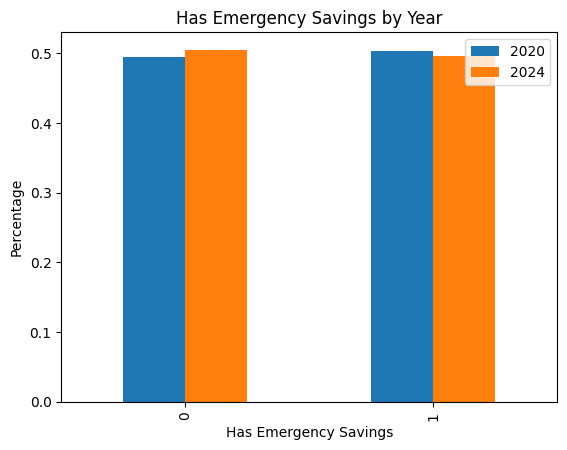

In [80]:
ef1.plot.bar()
plt.legend(loc = "upper right")
plt.title("Has Emergency Savings by Year")
plt.xlabel("Has Emergency Savings")
plt.ylabel("Percentage")

There is no big difference of emergency savings behavoir between 2020 and 2024. Although SHED represents millions of United States adults, the observed change in EF1 between 2020 and 2024 is less than one percentage point and likely reflects sampling noise rather than a real change in national emergency savings rates.

### 2.Emergency Savings with financially stable (EF3_A, EF3_C)


year       2020      2024
EF3_A                    
0      0.506092  0.493908
1      0.490628  0.509372


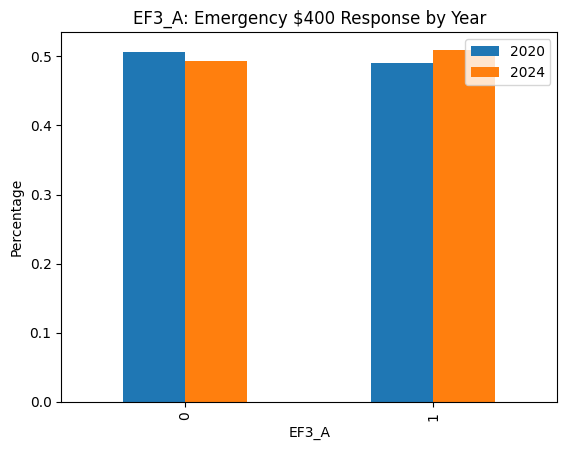

year       2020      2024
EF3_C                    
0      0.489696  0.510304
1      0.512709  0.487291


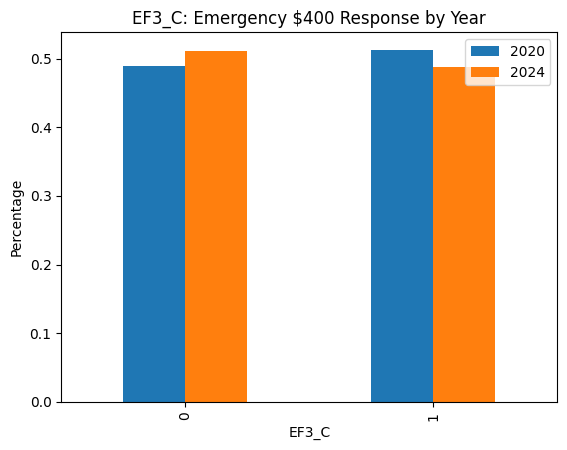

In [81]:
ef31 = ["EF3_A", "EF3_C"]

for col in ef31:
  ef3 = pd.crosstab(df_shed[col], df_shed["year"], normalize="index")
  print(ef3)
  ef3.plot.bar()
  plt.title(f"{col}: Emergency $400 Response by Year")
  plt.legend(loc = "upper right")
  plt.xlabel(col)
  plt.ylabel("Percentage")
  plt.show()


By looking at this charts, people who put it on their credit card and pay it off in full at the next statement have been increased about 3% over 4 years, and people who are not decreased about 2%.

The people with the money currently in my checking/savings account or with cash have decreased about 1.5% and people who are not paying with EF3_C method increased about 1.3% over 4 years.

People who are financially strong with no stressed are similar status in before and after COVID-19.

### 3. Emergency Savings with financially unstable (EF3_B, EF3_D, EF3_E, EF3_G / EF3_F, EF3_H)

year       2020      2024
EF3_B                    
0      0.500789  0.499211
1      0.495402  0.504598


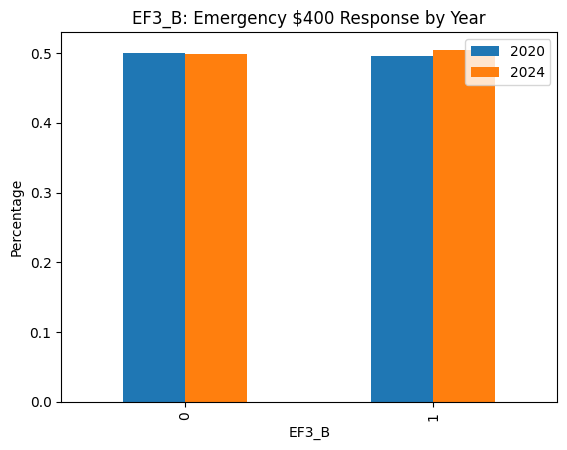

year       2020      2024
EF3_D                    
0      0.500779  0.499221
1      0.467890  0.532110


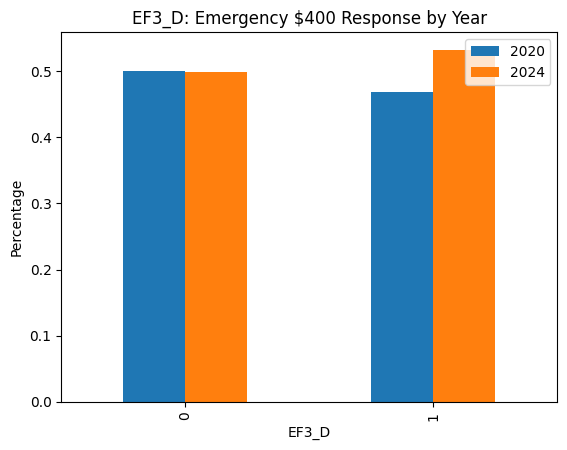

year       2020      2024
EF3_E                    
0      0.504496  0.495504
1      0.449789  0.550211


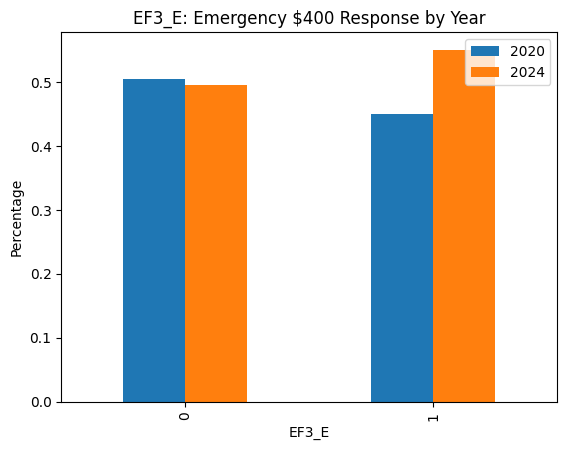

year       2020      2024
EF3_G                    
0      0.501586  0.498414
1      0.472684  0.527316


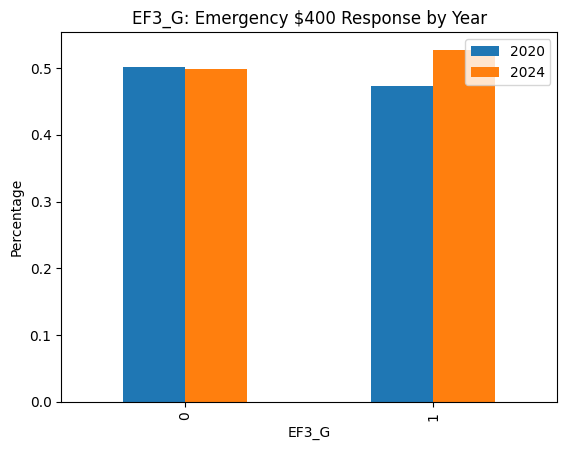

In [82]:
ef32 = ["EF3_B","EF3_D","EF3_E","EF3_G"]

for col in ef32:
  ef3 = pd.crosstab(df_shed[col], df_shed["year"], normalize="index")
  print(ef3)
  ef3.plot.bar()
  plt.title(f"{col}: Emergency $400 Response by Year")
  plt.legend(loc = "upper right")
  plt.xlabel(col)
  plt.ylabel("Percentage")
  plt.show()

EF3 of B, D, E, and G are the people who are financially stressed. Overall, number of people have been similar or increased who are financially stressed, especially people who are borrowing from their friends or family have been increased before and after COVID-19 finished.  

year       2020      2024
EF3_F                    
0      0.501344  0.498656
1      0.407295  0.592705


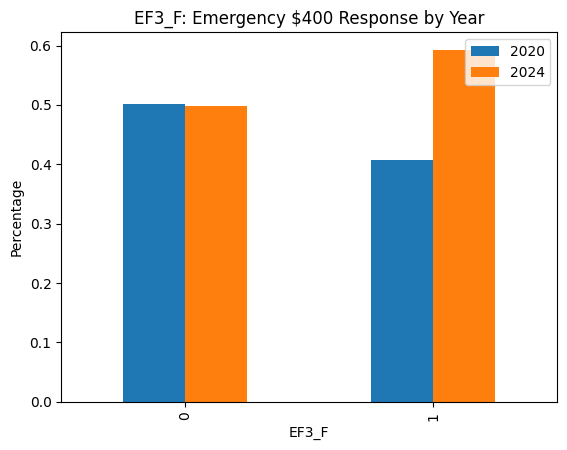

year       2020      2024
EF3_H                    
0      0.503677  0.496323
1      0.469642  0.530358


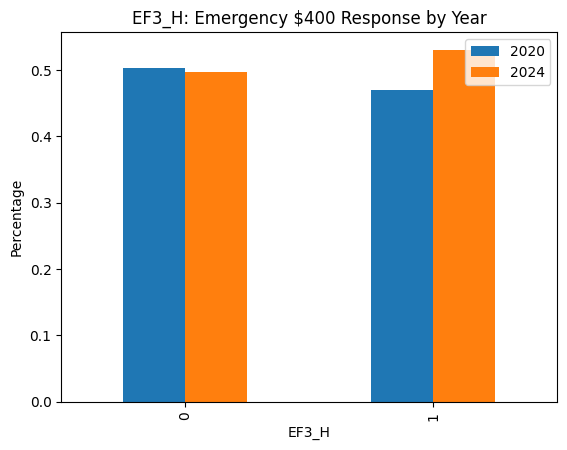

In [83]:
ef32 = ["EF3_F","EF3_H"]

for col in ef32:
  ef3 = pd.crosstab(df_shed[col], df_shed["year"], normalize="index")
  print(ef3)
  ef3.plot.bar()
  plt.title(f"{col}: Emergency $400 Response by Year")
  plt.legend(loc = "upper right")
  plt.xlabel(col)
  plt.ylabel("Percentage")
  plt.show()

EF3 of F and G are the people who are facing the high risk dealing financial literacy. The number of people have been increased before and after COVID-19, especially the people who are in payday loan or overdraft.

## Credit Card

year      2020      2024
C2A                     
0     0.068369  0.078664
1     0.431631  0.421336


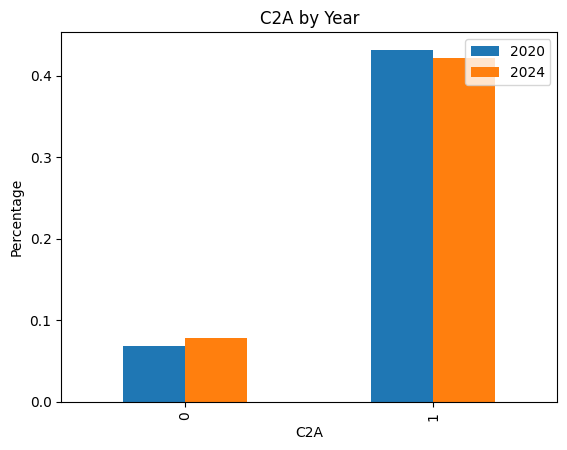

year      2020      2024
C4A                     
-2    0.068369  0.078664
 0    0.227695  0.233907
 1    0.020806  0.021979
 2    0.080228  0.073017
 3    0.102902  0.092433


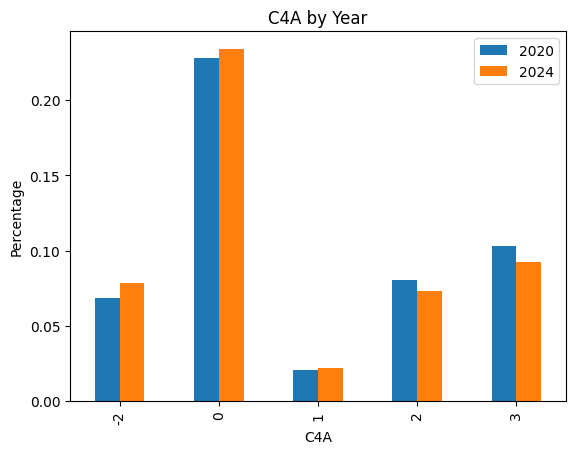

In [84]:
efb = ["C2A", "C4A"]

for col in efb:
  ef = pd.crosstab(df_shed[col], df_shed["year"], normalize = True)
  print(ef)
  ef.plot.bar()
  plt.title(f"{col} by Year")
  plt.legend(loc = "upper right")
  plt.xlabel(col)
  plt.ylabel("Percentage")
  plt.show()

For C4A of frequency of carrying unpaid balance, the response was:
- -2 : No credit card ownership
- 0 :always pay in full
- 1 : Once
- 2 : Some of the time
- 3 : Most or all the time

Credit card ownership decreased slightly between 2020 and 2024 (about one percentage point), indicating a small rise in households without access to revolving credit, though the change is small.

Credit card ownership (C2A) declined modestly from 2020 to 2024, with the share of non–credit card holders increasing by about one percentage point. The distribution of unpaid balance behavior **C4A** remained largely stable across years. Small improvements are evident slightly more respondents report paying their balance in full, and slightly fewer report carrying a balance frequently—but these shifts are within a narrow range. Overall, both credit access and repayment behavior exhibit minimal change between the two SHED waves.



# Financial Literacy with Credit Card Behavior

We will identify how people changed their behvoir of their financial literacy over dealing with their credit card balance.


## 1. Credit Card with Emergency Savings

We want to know how people hehaved of their emergency savings considering credit card balance issue. We will consider only the people who owned credit cards to aggregate with CFPB dataset later.

In [85]:
df_shed20ver2 = df_shed20[df_shed20["C4A"]!=-2]
print(df_shed20ver2["C4A"].unique())
df_shed20ver2.shape

[1 0 3 2]


(9937, 14)

In [86]:
df_shed24ver2 = df_shed24[df_shed24["C4A"]!=-2]
print(df_shed24ver2["C4A"].unique())
df_shed24ver2.shape

[0 3 2 1]


(10347, 14)

We make same set as what we did above.

In [87]:
df_shed24ver2 = df_shed24ver2.sample(n=9937, random_state=42)
print(df_shed20ver2.shape)

(9937, 14)


In [88]:
df_shed2 = pd.concat([df_shed20ver2, df_shed24ver2], ignore_index=True)
print(df_shed2.shape)
df_shed2.head()

(19874, 14)


,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,EF3_E,EF3_F,EF3_G,EF3_H,risk_score,proxy_credit_group,year
0,1,1,0,0,0,1,0,0,0,0,0,3,Prime,2020
1,1,0,1,0,0,1,0,0,0,0,0,0,Super-prime,2020
2,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
3,1,0,1,1,0,0,0,0,0,0,0,0,Super-prime,2020
4,1,0,1,1,0,1,0,0,0,0,0,0,Super-prime,2020


Most of the value is binary and if we use its mean, it indicates the percentage of respondents who show that behavior. So we will group the credit group and year using the mean of each behavior questions.

In [89]:
shed_year = df_shed.groupby(["year", "credit_score_group"]).agg({"C2A":"mean",
                                         "C4A":"mean",
                                         "EF1":"mean",
                                         "EF3_A":"mean",
                                         "EF3_B":"mean",
                                         "EF3_C":"mean",
                                         "EF3_D":"mean"}).reset_index()
shed_year

,year,credit_score_group,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D
0,2020,Deep subprime,1.000000,3.000000,0.000000,0.000000,1.000000,0.250000,1.000000
1,2020,Near-prime,0.859786,1.929893,0.109542,0.123661,0.365141,0.365628,0.047712
2,2020,Prime,0.710701,0.721661,0.497837,0.237381,0.090280,0.523219,0.017018
3,2020,Subprime,0.997006,2.934132,0.001497,0.059880,0.824850,0.217066,0.107784
4,2020,Super-prime,0.947161,-0.057540,0.913313,0.626739,0.009778,0.484017,0.004137
5,2024,Deep subprime,1.000000,3.000000,0.000000,0.000000,1.000000,0.444444,1.000000
6,2024,Near-prime,0.803743,1.647446,0.096105,0.141629,0.359130,0.329287,0.060698
7,2024,Prime,0.663993,0.482567,0.455415,0.254860,0.099352,0.466831,0.020056
8,2024,Subprime,0.997337,2.922770,0.000000,0.066578,0.797603,0.189081,0.097204
9,2024,Super-prime,0.939996,-0.074643,0.911802,0.626062,0.011025,0.490331,0.004157


### Aggregate

If we recap our CFPB dataset,

- month - Months obervation count from 2000 Jan.
- date - Observation date
- vol - Clean up version of vol_unadj that remove seasonal effects.
- vol_unadj -The actual total dollar volumn of new credit cards opened that month, which the actual money the bank gave out.
- credit_score_group - Divided each group by the credit score as:

  - Deep subprime : <580
  - Subprime : 580 ~ 619
  - Near-prime : 620 ~ 659
  - Prime : 660 ~ 719
  - Super-prime : 720+
So the more closest to the low credit score, the more risk borrower for the lenders. Additionally, the **vol** and **vol_unadj** are similar value.  

In [90]:
df_crc.head()

,month,date,vol,vol_unadj,credit_score_group
0,84,2007-01,2.544778e+10,2.261068e+10,Super-prime
1,84,2007-01,2.566262e+09,2.139431e+09,Near-prime
2,84,2007-01,4.680974e+08,4.052789e+08,Deep subprime
3,84,2007-01,8.426960e+09,7.433527e+09,Prime
4,84,2007-01,8.445496e+08,7.369389e+08,Subprime


We will extract only the year instead of full date.

In [91]:
df_crc["year"] = df_crc["date"].str[:4].astype(int)
df_crc= df_crc.drop(["date", "month"], axis=1)
df_crc.head()

,vol,vol_unadj,credit_score_group,year
0,2.544778e+10,2.261068e+10,Super-prime,2007
1,2.566262e+09,2.139431e+09,Near-prime,2007
2,4.680974e+08,4.052789e+08,Deep subprime,2007
3,8.426960e+09,7.433527e+09,Prime,2007
4,8.445496e+08,7.369389e+08,Subprime,2007


In [92]:
df_crc.head()

,vol,vol_unadj,credit_score_group,year
0,2.544778e+10,2.261068e+10,Super-prime,2007
1,2.566262e+09,2.139431e+09,Near-prime,2007
2,4.680974e+08,4.052789e+08,Deep subprime,2007
3,8.426960e+09,7.433527e+09,Prime,2007
4,8.445496e+08,7.369389e+08,Subprime,2007


We want the total credict issued to each credit score group in each year, so we sum volumne grouping credit score group and the year. We want to see how total dollar amount of new credit accounts opend in each score group.


In [93]:
crc_year = df_crc.groupby(["year", "credit_score_group"]).agg({"vol": "sum", "vol_unadj": "sum"}).reset_index()
crc_year = crc_year[(crc_year["year"]== 2020) | (crc_year["year"]==2024)]
crc_year

,year,credit_score_group,vol,vol_unadj
65,2020,Deep subprime,3.698796e+09,3.697304e+09
66,2020,Near-prime,1.259679e+10,1.245782e+10
67,2020,Prime,4.644728e+10,4.615220e+10
68,2020,Subprime,5.100159e+09,5.064965e+09
69,2020,Super-prime,1.883554e+11,1.877204e+11
85,2024,Deep subprime,5.118149e+09,5.117382e+09
86,2024,Near-prime,1.685014e+10,1.681169e+10
87,2024,Prime,7.139733e+10,7.128327e+10
88,2024,Subprime,6.768039e+09,6.762368e+09
89,2024,Super-prime,3.798105e+11,3.790082e+11


we want to reduce the vol value using the log function.

In [94]:
crc_year["log_vol"] = np.log(crc_year["vol"])
crc_year

,year,credit_score_group,vol,vol_unadj,log_vol
65,2020,Deep subprime,3.698796e+09,3.697304e+09,22.031273
66,2020,Near-prime,1.259679e+10,1.245782e+10,23.256708
67,2020,Prime,4.644728e+10,4.615220e+10,24.561584
68,2020,Subprime,5.100159e+09,5.064965e+09,22.352538
69,2020,Super-prime,1.883554e+11,1.877204e+11,25.961597
85,2024,Deep subprime,5.118149e+09,5.117382e+09,22.356059
86,2024,Near-prime,1.685014e+10,1.681169e+10,23.547625
87,2024,Prime,7.139733e+10,7.128327e+10,24.991526
88,2024,Subprime,6.768039e+09,6.762368e+09,22.635477
89,2024,Super-prime,3.798105e+11,3.790082e+11,26.662938


Let's identify how the credit balance impact from the group score in both 2020 and 2024.

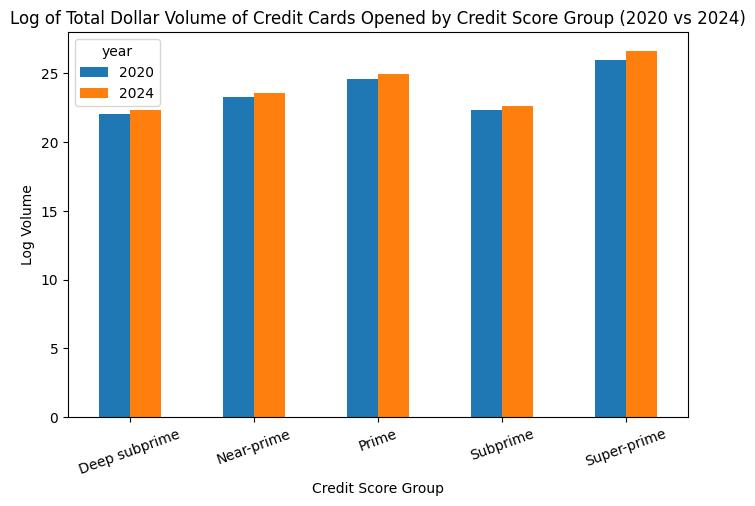

In [95]:
pivot = crc_year.pivot(
    index="credit_score_group",
    columns="year",
    values="log_vol"
)

pivot.plot(kind="bar", figsize=(8,5))
plt.title("Log of Total Dollar Volume of Credit Cards Opened by Credit Score Group (2020 vs 2024)")
plt.xlabel("Credit Score Group")
plt.ylabel("Log Volume")
plt.xticks(rotation=20)
plt.show()

We can identify that lenders issued more credit in 2024 than in 2020, regardless of borrower credit quality. We can see the patterns of how the credit balances are distributed as it explained:

- Deep subprime : <580
- Subprime : 580 ~ 619
- Near-prime : 620 ~ 659
- Prime : 660 ~ 719
- Super-prime : 720+

The group that is closer to Super-prime has more volumne of credit card usage.

We will merge the **CFPB** and **SHED** datasets by year and credit score group.

In [96]:
merged = pd.merge(
    shed_year,
    crc_year,
    on=["year", "credit_score_group"],
    how="inner"
)

merged

,year,credit_score_group,C2A,C4A,EF1,EF3_A,EF3_B,EF3_C,EF3_D,vol,vol_unadj,log_vol
0,2020,Deep subprime,1.000000,3.000000,0.000000,0.000000,1.000000,0.250000,1.000000,3.698796e+09,3.697304e+09,22.031273
1,2020,Near-prime,0.859786,1.929893,0.109542,0.123661,0.365141,0.365628,0.047712,1.259679e+10,1.245782e+10,23.256708
2,2020,Prime,0.710701,0.721661,0.497837,0.237381,0.090280,0.523219,0.017018,4.644728e+10,4.615220e+10,24.561584
3,2020,Subprime,0.997006,2.934132,0.001497,0.059880,0.824850,0.217066,0.107784,5.100159e+09,5.064965e+09,22.352538
4,2020,Super-prime,0.947161,-0.057540,0.913313,0.626739,0.009778,0.484017,0.004137,1.883554e+11,1.877204e+11,25.961597
5,2024,Deep subprime,1.000000,3.000000,0.000000,0.000000,1.000000,0.444444,1.000000,5.118149e+09,5.117382e+09,22.356059
6,2024,Near-prime,0.803743,1.647446,0.096105,0.141629,0.359130,0.329287,0.060698,1.685014e+10,1.681169e+10,23.547625
7,2024,Prime,0.663993,0.482567,0.455415,0.254860,0.099352,0.466831,0.020056,7.139733e+10,7.128327e+10,24.991526
8,2024,Subprime,0.997337,2.922770,0.000000,0.066578,0.797603,0.189081,0.097204,6.768039e+09,6.762368e+09,22.635477
9,2024,Super-prime,0.939996,-0.074643,0.911802,0.626062,0.011025,0.490331,0.004157,3.798105e+11,3.790082e+11,26.662938


### Did credit access increase the most for financially stable groups?

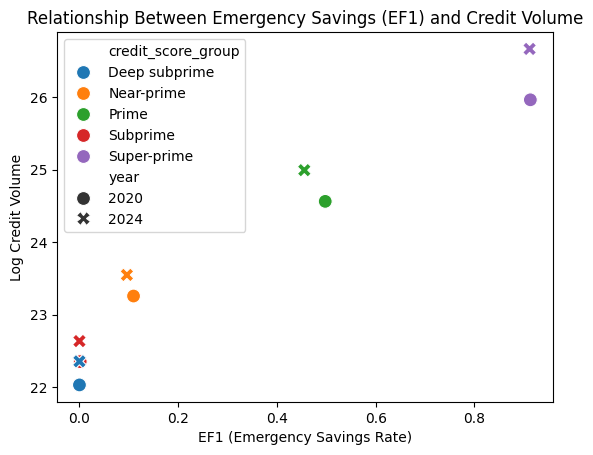

In [97]:
sns.scatterplot(
    data=merged,
    x="EF1",
    y="log_vol",
    hue="credit_score_group",
    style="year",
    s=100
)

plt.title("Relationship Between Emergency Savings (EF1) and Credit Volume")
plt.xlabel("EF1 (Emergency Savings Rate)")
plt.ylabel("Log Credit Volume")
plt.show()

The credit access is strongly aligned with financial stability that credit score groups with higher emergency savings rates of **EF1** consistenly receive much higher credit volumnes in both 2020 and 2024. However, Deep Subprime and Subprime groups where bottom-left shows the weakest financial stability with receiving the least new credit. Overall, all groups in 2024 have high credit volume then 2020 showing that financial stability have been better after COVID-19.

### Financial Stress Indicators Across Groups

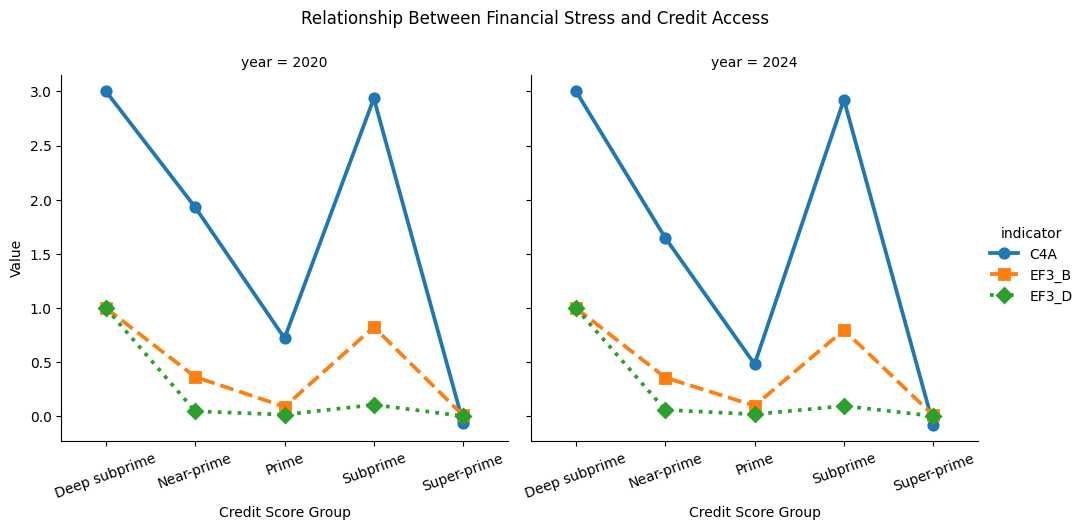

In [98]:
stress = merged[["year","credit_score_group","C4A","EF3_B","EF3_D"]]

stress_melt = stress.melt(
    id_vars=["year","credit_score_group"],
    value_vars=["C4A","EF3_B","EF3_D"],
    var_name="indicator",
    value_name="value"
)

g=sns.catplot(
    data=stress_melt,
    x="credit_score_group",
    y="value",
    hue="indicator",
    col="year",
    kind="point",
    markers=["o", "s", "D"],
    linestyles=["-", "--", ":"]
)

g.fig.suptitle("Relationship Between Financial Stress and Credit Access")
g.fig.subplots_adjust(top=0.85)
g.set_xticklabels(rotation=20)
g.set_axis_labels(x_var="Credit Score Group", y_var="Value")
plt.show()

Carrying unpqaid balance **C4A** was the highest for Deep Subprime and Subprime in both years. The Super-prime had near zero indicating very strong financial habbits. As the **EF3_B** of using credit card to pay emergencies over time again showing highest in Subprime and Deep Subprime. This indicates that lower credit score groups depend more on revolving credit during emergencies then higher credit score groups. **EF3_D** of using loans / borrowing for emergencies shows the highest for Deep Subprime, lowest on Super-prime. This indicates financial stress behaviors cluster heavily in lower credit tiers.

Deep Subprime and Subprime hoouseholds rely more on borrowing and revolving credit and caryy unpaid balances at much higher rates. Prime and Super-prime households, in contrast, demonstrates strongeer financial resilience and better credit management. This pattern did not change from 2020 to 2024, despite the economic recovery.



# Research Question

1. **Did the strength of the relationship between financial literacy and household credit card change after COVID-19?**

From SHED (2020 vs 2024),
- EF1 (has emergency savings) is almost identical in 2020 and 2024 (≈50/50).
- “Good” emergency responses (EF3_A, EF3_C) and “bad/stressful” responses (EF3_B, EF3_D/E/F/G/H) changed only by ~1–3 percentage points.
- Credit card ownership (C2A) and unpaid balance behavior (C4A) are also very stable, with only small shifts (~1%).

So financial literacy / resilience indicators and credit-card behaviors are basically stable across years in the SHED data.

From merged SHED and CFPB,

- In both 2020 and 2024, groups with higher EF1 and more “good” EF3 behavior (Prime & Super-prime) have much higher credit volumes.
- Deep Subprime & Subprime have:

  - lowest EF1 and “good” EF3_A/C

  - highest stress indicators (C4A, EF3_B, EF3_D)

  - lowest credit volume.

Overall, there is no evidence that the strength of the relationship between financial literacy and household credit card debt changed after COVID-19. In both 2020 and 2024, credit-score groups with higher financial resilience (higher emergency savings rates and more cash-based emergency responses) consistently received much larger volumes of new credit card limits, while financially stressed groups (Deep Subprime and Subprime) had both weaker financial literacy indicators and lower credit volumes. Although total credit volume increased for all groups between 2020 and 2024, the association between financial literacy and credit access remained strong and qualitatively similar across both years.



2. **Did households with higher financial literacy show smaller increases in debt post-COVID-19?**

From CPPB vol as proxy for new credit card debt,
- The bar chart of log_vol by credit_score_group (2020 vs 2024) shows:

  - All credit-score groups saw higher credit volume in 2024 than in 2020.

  - The largest increases are in Prime and Super-prime groups.

  - Deep Subprime and Subprime also increased, but by a smaller amount.


From EF1 vs log_vol,

- Points for 2024 are above the 2020 points for every credit_score_group → more credit in 2024.

- The positive relationship between EF1 and log_vol is clear: higher EF1 → higher credit volume, and this holds in both years.

Overall, no that households with higher financial literacy did not show smaller increases in credit-card debt; instead, they experienced larger increases in credit access. Between 2020 and 2024, total credit volumes increased across all credit-score groups, but the largest growth occurred among Prime and Super-prime borrowers—those with the strongest emergency savings and lowest financial stress indicators. Deep Subprime and Subprime groups, which show weaker financial literacy and higher financial stress, also saw some growth in new credit card limits, but their increases were smaller in magnitude. This suggests that post-COVID credit expansion primarily benefited financially stronger households rather than reducing debt growth among them.